<a href="https://colab.research.google.com/github/lizchase/Python-Class-Projects/blob/main/Project_3_Elizabeth_Chase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [330]:
#from google.colab import drive
#drive.mount('/content/drive')
#path = '/content/drive/MyDrive/NYPD_Arrests.csv'
#df = pd.read_csv(path)

#I used the API to complete the project initially and then tried to upload the file from Google Drive instead.
#This broke my analysis as the column headers are formatted slightly differently in the csv.
#I decided to continue using the API so I don't have to go back through the entire project.

In [331]:
df = pd.read_csv('https://data.cityofnewyork.us/resource/uip8-fykc.csv?$limit=200000')

#Using the API link to read the data direct from NYC Open Data.
#Add ?$limit=200000 to make sure all data is imported otherwise only 1000 rows will import.
#https://support.socrata.com/hc/en-us/articles/202949268-How-to-query-more-than-1000-rows-of-a-dataset

**Data Exploration**

In [332]:
df.head()

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column
0,261209118,2023-01-01T00:00:00.000,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,2023-02-03T00:00:00.000,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,2023-02-15T00:00:00.000,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,2023-01-04T00:00:00.000,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,2023-02-13T00:00:00.000,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)


In [333]:
df.count()

arrest_key           170095
arrest_date          170095
pd_cd                170095
pd_desc              170095
ky_cd                170082
ofns_desc            170095
law_code             170095
law_cat_cd           168838
arrest_boro          170095
arrest_precinct      170095
jurisdiction_code    170095
age_group            170095
perp_sex             170095
perp_race            170095
x_coord_cd           170095
y_coord_cd           170095
latitude             170095
longitude            170095
geocoded_column      170095
dtype: int64

In [334]:
df.isnull().sum()

arrest_key              0
arrest_date             0
pd_cd                   0
pd_desc                 0
ky_cd                  13
ofns_desc               0
law_code                0
law_cat_cd           1257
arrest_boro             0
arrest_precinct         0
jurisdiction_code       0
age_group               0
perp_sex                0
perp_race               0
x_coord_cd              0
y_coord_cd              0
latitude                0
longitude               0
geocoded_column         0
dtype: int64

In [335]:
df.groupby(['arrest_boro'])['arrest_key'].count()

arrest_boro
B    39957
K    46825
M    39652
Q    36246
S     7415
Name: arrest_key, dtype: int64

In [336]:
df.groupby(['arrest_precinct'])['arrest_key'].count()

arrest_precinct
1      1676
5      2399
6      1717
7      1478
9      1513
       ... 
115    2608
120    3602
121    1836
122    1204
123     773
Name: arrest_key, Length: 77, dtype: int64

**Question: How does the 114th precinct where I live compare to the other precincts in Queens?  I will compare the number of arrests in each of the level of arrests ('law_cat_cd").**

**Data Cleaning**

In [337]:
df2 = df[['arrest_key', 'arrest_date', 'pd_desc', 'law_cat_cd', 'arrest_boro', 'arrest_precinct']]
df2.head()
#Reducing the number of columns

,arrest_key,arrest_date,pd_desc,law_cat_cd,arrest_boro,arrest_precinct
0,261209118,2023-01-01T00:00:00.000,"ASSAULT 2,1,UNCLASSIFIED",F,K,77
1,262984267,2023-02-03T00:00:00.000,"CONTROLLED SUBSTANCE,SALE 3",F,K,73
2,263664549,2023-02-15T00:00:00.000,STRANGULATION 1ST,F,K,62
3,261345231,2023-01-04T00:00:00.000,STRANGULATION 1ST,F,M,32
4,263536618,2023-02-13T00:00:00.000,"ASSAULT 2,1,UNCLASSIFIED",F,K,71


In [338]:
df3 = df2.loc[df['arrest_boro'] == 'Q']
df3.head()
#Reducing data set to Queens only
#https://www.nyc.gov/site/nypd/bureaus/patrol/precincts-landing.page

,arrest_key,arrest_date,pd_desc,law_cat_cd,arrest_boro,arrest_precinct
5,262030390,2023-01-17T00:00:00.000,STRANGULATION 1ST,F,Q,113
11,262906326,2023-02-02T00:00:00.000,ASSAULT 3,M,Q,108
18,263857243,2023-02-18T00:00:00.000,ASSAULT 3,M,Q,105
22,267689461,2023-05-03T00:00:00.000,RAPE 3,F,Q,100
29,269857487,2023-06-14T00:00:00.000,STRANGULATION 1ST,F,Q,101


In [339]:
df3.count()
#Count matches with the groupby borough

arrest_key         36246
arrest_date        36246
pd_desc            36246
law_cat_cd         36094
arrest_boro        36246
arrest_precinct    36246
dtype: int64

In [340]:
df3.isnull().sum()
#Shows that there is missing data in the 'law_cat_cd' (level of offense) column

arrest_key           0
arrest_date          0
pd_desc              0
law_cat_cd         152
arrest_boro          0
arrest_precinct      0
dtype: int64

In [341]:
df3.groupby(['law_cat_cd'])['arrest_key'].count()
#Shows that there is "9", "I", that will need to be filtered or updated in addition to nan.
#"9" and "I" are not defined in the data dictionary

law_cat_cd
9      427
F    16010
I       50
M    19508
V       99
Name: arrest_key, dtype: int64

In [342]:
df3['arrest_precinct'].unique()
#This column is okay and doesn't have any missing or odd values

array([113, 108, 105, 100, 101, 114, 103, 106, 115, 102, 112, 111, 104,
       110, 107, 109])

Looking at the CSV, the "9", "I" , and even nan values in the 'law_cat_cd' column correspond to other arrests not falling under the felony, misdemeanor, or violation categories.  While these values directly correlate with specific offense descriptions (ie. 9 = "other state laws"), I have chosen to drop these values from my analysis.  They do not make up a significant portion of the arrest record nor are they defined well enough to include.  

In [343]:
df4 = df3.dropna(how='any')
df4.count()

#Drops all NaN values

arrest_key         36094
arrest_date        36094
pd_desc            36094
law_cat_cd         36094
arrest_boro        36094
arrest_precinct    36094
dtype: int64

In [344]:
df5 = df4.loc[(df['law_cat_cd'] != '9') & (df['law_cat_cd'] != 'I')]
df5.count()

#Removes rows with '9' and 'I' in the 'law_cat_cd' column

arrest_key         35617
arrest_date        35617
pd_desc            35617
law_cat_cd         35617
arrest_boro        35617
arrest_precinct    35617
dtype: int64

In [345]:
df6 = df5.rename(columns={'arrest_key': 'Arrest Key', 'arrest_date': 'Arrest Date', 'pd_desc': 'Description', 'law_cat_cd': 'Level of Offense', 'arrest_boro': 'Borough', 'arrest_precinct': 'Precinct'})
#Cleans up column names

In [346]:
level_key = {
    'F': 'Felony',
    'M': 'Misdemeanor',
    'V': 'Violation',
}

def clean_level_column(level):
  return level_key.get(level, level)

df7 = df6.copy()
df7['Level of Offense'] = df7['Level of Offense'].apply(clean_level_column)

df7.head()

#Cleans up 'level of offense' column to show full values
#https://saturncloud.io/blog/how-to-replace-values-on-specific-columns-in-pandas/

,Arrest Key,Arrest Date,Description,Level of Offense,Borough,Precinct
5,262030390,2023-01-17T00:00:00.000,STRANGULATION 1ST,Felony,Q,113
11,262906326,2023-02-02T00:00:00.000,ASSAULT 3,Misdemeanor,Q,108
18,263857243,2023-02-18T00:00:00.000,ASSAULT 3,Misdemeanor,Q,105
22,267689461,2023-05-03T00:00:00.000,RAPE 3,Felony,Q,100
29,269857487,2023-06-14T00:00:00.000,STRANGULATION 1ST,Felony,Q,101


**Analysis**

In [347]:
df7.groupby(['Precinct'])['Arrest Key'].count().sort_values(ascending=False).reset_index()
#total number of arrests in each Queens Precinct

,Precinct,Arrest Key
0,103,4568
1,113,3402
2,110,3276
3,109,3229
4,105,2776
5,114,2662
6,115,2576
7,102,2254
8,106,2041
9,107,1666


In [348]:
offense_counts = df7.groupby(['Precinct','Level of Offense'])['Arrest Key'].aggregate('count').reset_index()
offense_counts
#Shows the arrests in each precinct broken down by level of offense

,Precinct,Level of Offense,Arrest Key
0,100,Felony,398
1,100,Misdemeanor,469
2,100,Violation,4
3,101,Felony,764
4,101,Misdemeanor,601
5,101,Violation,2
6,102,Felony,1089
7,102,Misdemeanor,1163
8,102,Violation,2
9,103,Felony,1849


In [349]:
offense_pivot = offense_counts.pivot(index='Precinct', columns='Level of Offense', values='Arrest Key')
offense_pivot

#Creates a better table of the information in the groupby function. Don't need to use reset_index() as I will not use Seaborn for the plot.
#Precinct 111 has a NaN as there were no violation arrests.

Level of Offense,Felony,Misdemeanor,Violation
Precinct,,,
100,398.0,469.0,4.0
101,764.0,601.0,2.0
102,1089.0,1163.0,2.0
103,1849.0,2701.0,18.0
104,677.0,804.0,3.0
105,1307.0,1465.0,4.0
106,938.0,1095.0,8.0
107,790.0,868.0,8.0
108,755.0,858.0,8.0


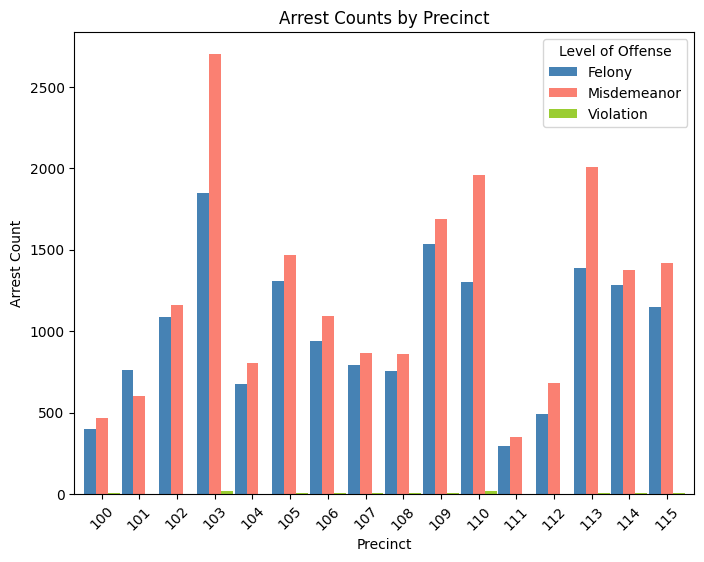

In [350]:
offense_pivot.plot(kind='bar',figsize=(8, 6), width = .95, color=['steelblue', 'salmon', 'yellowgreen'])

plt.xlabel('Precinct')
plt.ylabel('Arrest Count')
plt.title('Arrest Counts by Precinct')
plt.legend(title='Level of Offense')
plt.xticks(rotation=45)

plt.show()

#A simple bar chart of each arrest by level of offense in each Queens precinct

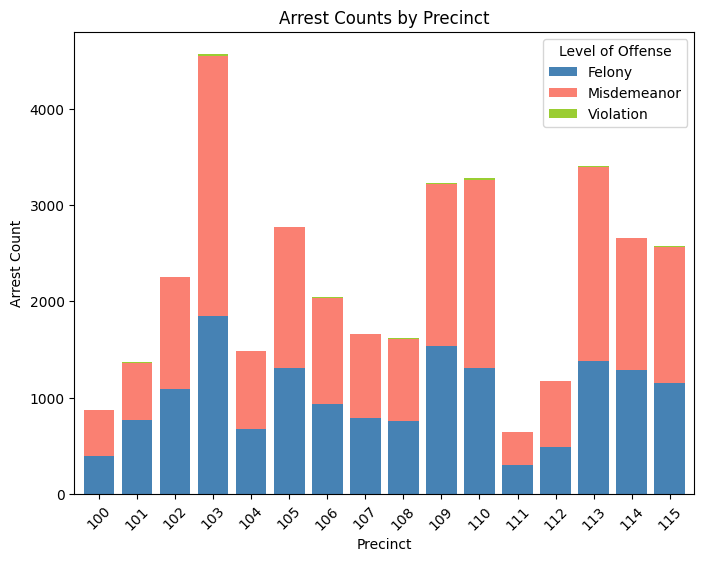

In [351]:
offense_pivot.plot(kind='bar', stacked=True, figsize=(8,6), width = .8,color=['steelblue', 'salmon', 'yellowgreen'])

plt.xlabel('Precinct')
plt.ylabel('Arrest Count')
plt.title('Arrest Counts by Precinct')
plt.legend(title='Level of Offense')
plt.xticks(rotation=45)

plt.show()

#From the resources I found, it appears difficult to create a stacked bar chart in Seaborn.

**Conclusion** The 114 precinct has the 6th highest overall arrest record in Queens with 2662 arrest year to date. The charts show that it is almost a 50/50 split between felony and misdemeanor arrests, with violations being < .002% of arrests.  Most precincts have more misdemeanor arrests than felony arrests.

**Bias**  My analysis does not account for population within these precincts.  It's possible the precincts with a high arrest count also have a high population and therefore a lower or similar arrest rate as the other precincts.  

It's also possible that filtering out the arrests not consistent with felony, misdemeanor, or violation introduced bias by excluding a not insignificant amount of arrest records.  

Also, this is just arrest data, not conviction data.  It doesn't necessary indicate that there is an issue with crime simply because of a high arrest count.  